<a href="https://colab.research.google.com/github/hisyamhilmiomar/algoTradingStrat/blob/main/Stock_Market_Performance_Analysis_during_Election_Periods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Video Reference](https://www.youtube.com/watch?v=5de4N7FsiMk&list=WL&index=25)

In [ ]:
#Import the libraries

import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [ ]:
ticker = '^GSPC' #S&P500 ticker

sp500 = yf.download(ticker, start = '1990-01-01')

sp500['Date'] = sp500.index
sp500


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Date
Date,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,359.690002,162070000,1990-01-02
1990-01-03,359.690002,360.589996,357.890015,358.760010,358.760010,192330000,1990-01-03
1990-01-04,358.760010,358.760010,352.890015,355.670013,355.670013,177000000,1990-01-04
1990-01-05,355.670013,355.670013,351.350006,352.200012,352.200012,158530000,1990-01-05
1990-01-08,352.200012,354.239990,350.540009,353.790009,353.790009,140110000,1990-01-08
...,...,...,...,...,...,...,...
2024-05-17,5303.100098,5305.450195,5283.589844,5303.270020,5303.270020,3578120000,2024-05-17
2024-05-20,5305.350098,5325.319824,5302.399902,5308.129883,5308.129883,3420100000,2024-05-20
2024-05-21,5298.689941,5324.319824,5297.870117,5321.410156,5321.410156,3662240000,2024-05-21


In [ ]:
#Create empty lists
date_sp500_election_years = []
adj_close_sp500_election_years = []
date_sp500_non_election_years = []
adj_close_sp500_non_election_years = []

#Loop through data to get election and non-election years

for i in range(0, len(sp500)):
  if sp500['Date'][i].year % 4 == 0:
    date_sp500_election_years.append(sp500['Date'][i])
    adj_close_sp500_election_years.append(sp500['Adj Close'][i])
  else:
    date_sp500_non_election_years.append(sp500['Date'][i])
    adj_close_sp500_non_election_years.append(sp500['Adj Close'][i])

In [ ]:
# Create empty dataframe and store election year data in a variable

election_sp500_data = pd.DataFrame()
election_sp500_data['Date'] = date_sp500_election_years
election_sp500_data['Adj Close'] = adj_close_sp500_election_years

non_election_sp500_data = pd.DataFrame()
non_election_sp500_data['Date'] = date_sp500_non_election_years
non_election_sp500_data['Adj Close'] = adj_close_sp500_non_election_years

In [ ]:
# Get average returns for both election and non election years
election_year_avg_returns = election_sp500_data['Adj Close'].pct_change().mean()
non_election_year_avg_returns = non_election_sp500_data['Adj Close'].pct_change().mean()


In [ ]:
# Print result of average returns

print('Average return in election years : ', election_year_avg_returns * 100, ' %')
print('Average return in non election years : ', non_election_year_avg_returns*100, ' %')

Average return in election years :  0.15933119382971753  %
Average return in non election years :  0.047189088067497297  %


In [ ]:
#Print if the stock market tends to go up during an election year or not

if election_year_avg_returns > non_election_year_avg_returns:
  print("Stocks historically tend to go up during election years based on this data")
else:
  print("Stocks historically do not show a clear tendency to go up or down during an election year based on this data")

Stocks historically tend to go up during election years based on this data


Text(0.5, 1.0, 'Election years vs Non-election Years')

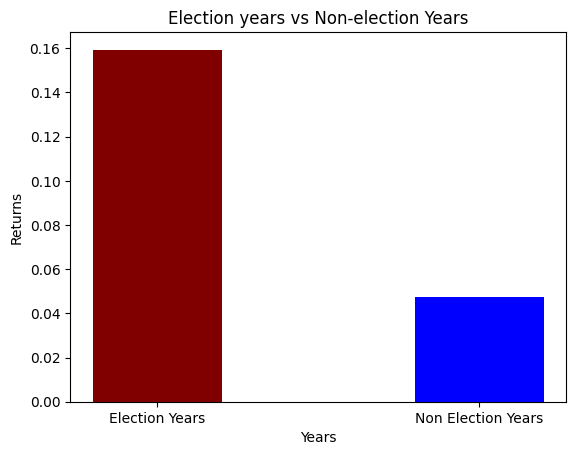

In [ ]:
# Create bar plot to visualise return

plt.bar('Election Years', election_year_avg_returns *100, color = "maroon", width = 0.4)
plt.bar('Non Election Years', non_election_year_avg_returns *100, color = "blue", width = 0.4)
plt.xlabel('Years')
plt.ylabel('Returns')
plt.title('Election years vs Non-election Years')